# 0. Import packages

In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 1. Do stimuli of a neuron have coherent concepts?

## 1-1. Showing selected training images

In [2]:
raw_data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

raw_training_datasets = datasets.ImageFolder(
    '../../../../ILSVRC2012/train',
    raw_data_transform
)

def show_imgs(img_idxs):
    for img_idx in img_idxs:
        img = raw_training_datasets[img_idx][0]
        img = np.einsum('kij->ijk', img)
        plt.title(f'img: {img_idx}')
        plt.imshow(img)
        plt.show()
        
def show_np_imgs_2_rows(imgs, title=None, subplot_titles=None):
    # Create figure
    nrows = 2
    ncols = len(imgs) // nrows
    fig, ax = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows))
    fig.tight_layout()
    
    # Create subplots
    for i, img in enumerate(imgs[:nrows * ncols]):
        row = int(i / ncols)
        col = i - row * ncols
        ax[row, col].imshow(img) 
        ax[row, col].set_axis_off()
        if subplot_titles is not None:
            ax[row, col].set_title(subplot_titles[i])

    # Title
    if title is not None:
        fig.suptitle(title, y=1.06)
        
    # Show the final plot
    plt.show()
        
def show_imgs_2_rows(img_idxs, title=None):
    # Images
    imgs = []
    subplot_titles = []
    for i, img_idx in enumerate(img_idxs):
        img = raw_training_datasets[img_idx][0]
        img = np.einsum('kij->ijk', img)
        imgs.append(img)
        subplot_titles.append(f'{i}-th img: {img_idx}')
        
    # Show images
    show_np_imgs_2_rows(imgs, title=title, subplot_titles=subplot_titles)

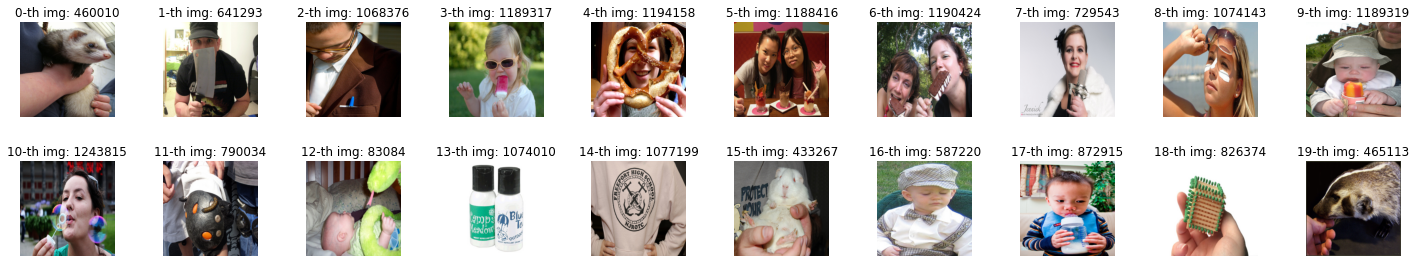

In [3]:
# Test
imgs = [460010, 641293, 1068376, 1189317, 1194158, 1188416, 1190424, 729543, 1074143, 1189319, 1243815, 790034, 83084, 1074010, 1077199, 433267, 587220, 872915, 826374, 465113]
show_imgs_2_rows(imgs)

## 1-2. Load stimulus

In [4]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

def get_stimulus_path(model_nickname, topk_s):
    return f'/raid/NeuEvo/data/stimulus/{model_nickname}/data/stimulus-topk_s={topk_s}.json'

def load_stimulus(model_nickname, topk_s):
    p = get_stimulus_path(model_nickname, topk_s)
    data = load_json(p)
    return data

In [5]:
# Test
model_nickname = 'convnext_0.004_96'
topk_s = 20
stimulus = load_stimulus(model_nickname, topk_s)

layers = list(stimulus.keys())
print(layers)

['features_1_blk_0', 'features_1_blk_1', 'features_1_blk_2', 'features_2_blk_0', 'features_2_blk_1', 'features_3_blk_0', 'features_3_blk_1', 'features_3_blk_2', 'features_4_blk_0', 'features_4_blk_1', 'features_5_blk_0', 'features_5_blk_1', 'features_5_blk_2', 'features_5_blk_3', 'features_5_blk_4', 'features_5_blk_5', 'features_5_blk_6', 'features_5_blk_7', 'features_5_blk_8', 'features_6_blk_0', 'features_6_blk_1', 'features_7_blk_0', 'features_7_blk_1', 'features_7_blk_2']


## 1-3. Test if stimuli of neurons in ConvNeXt_0.004_96 have coherent concepts

In [6]:
# Load stimulus
model_nickname = 'convnext_0.004_96'
topk_s = 20
stimulus = load_stimulus(model_nickname, topk_s)

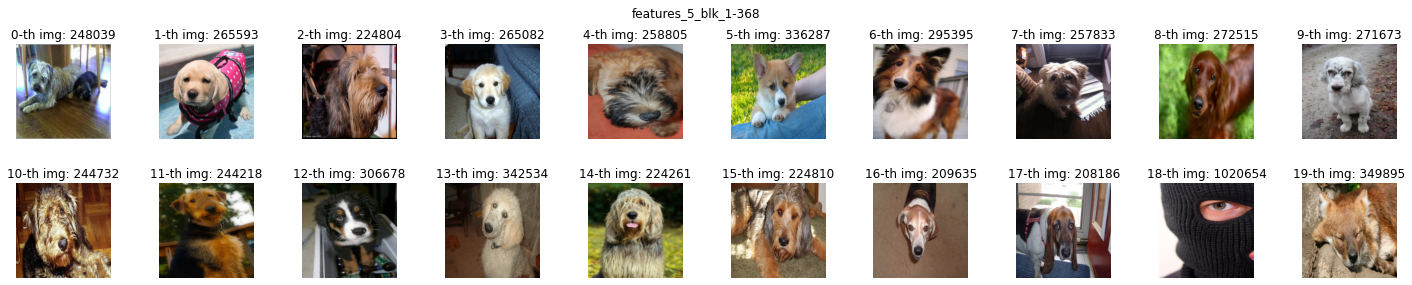

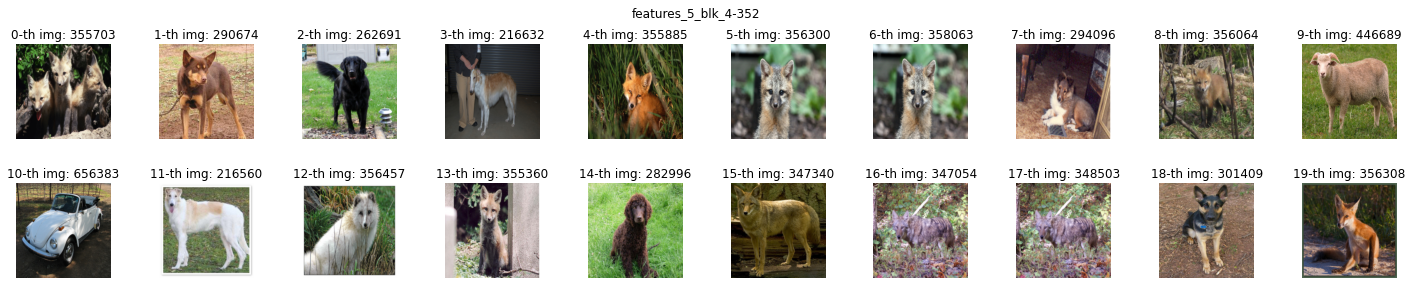

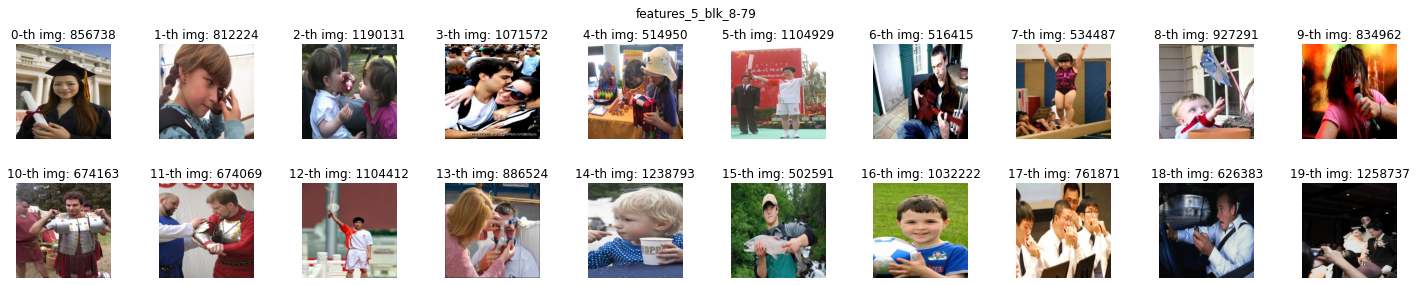

In [9]:
# Sample layers
layers = list(stimulus.keys())
num_sampled_layers = 3
sampled_layers = sorted(np.random.choice(layers, num_sampled_layers, replace=False))

# In a sampled layer, show stimuli of a sampled neuron
for sampled_layer in sampled_layers:
    num_neurons = len(stimulus[sampled_layer])
    sampled_neuron = np.random.choice(num_neurons)
    neuron_id = f'{sampled_layer}-{sampled_neuron}'
    stimulating_imgs = stimulus[sampled_layer][sampled_neuron]
    show_imgs_2_rows(stimulating_imgs, title=neuron_id)

# 2. Do neurons of similar stimuli have similar concepts, even if they are in different models? 

## 2-1. Example patches

In [10]:
def get_ex_patch_dir_path(model_nickname, topk_s, ex_patch_size_ratio):
    root = '/raid/NeuEvo/data/neuron_feature'
    return f'{root}/{model_nickname}/data/topk_s={topk_s}-ex_patch_size_ratio={ex_patch_size_ratio}'

def get_ex_patch_img_paths(model_nickname, topk_s, ex_patch_size_ratio, layer, neuron_idx):
    d = get_ex_patch_dir_path(model_nickname, topk_s, ex_patch_size_ratio)
    paths = []
    for i in range(topk_s):
        paths.append(f'{d}/{layer}-{neuron_idx}-{i}.jpg')
    return paths

def load_img_from_path(p):
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
                     
def show_ex_patch(model_nickname, topk_s, ex_patch_size_ratio, layer, neuron_idx):
    img_ps = get_ex_patch_img_paths(model_nickname, topk_s, ex_patch_size_ratio, layer, neuron_idx)
    imgs = [load_img_from_path(img_path) for img_path in img_ps]
    title = f'{model_nickname}, {layer}-{neuron_idx}'
    show_np_imgs_2_rows(imgs, title=title, subplot_titles=None)

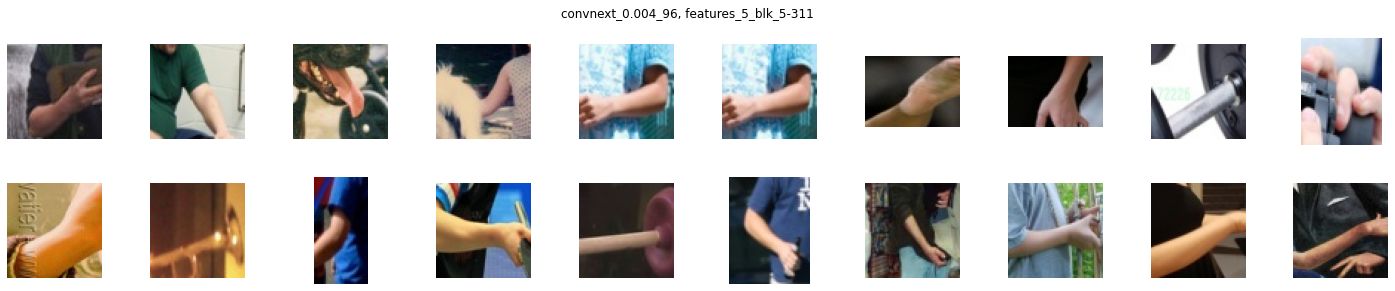

In [11]:
topk_s = 20
ex_patch_size_ratio = 0.3

model_nickname = 'convnext_0.004_96'
layer = 'features_5_blk_5'
neuron_idx = 311

show_ex_patch(model_nickname, topk_s, ex_patch_size_ratio, layer, neuron_idx)

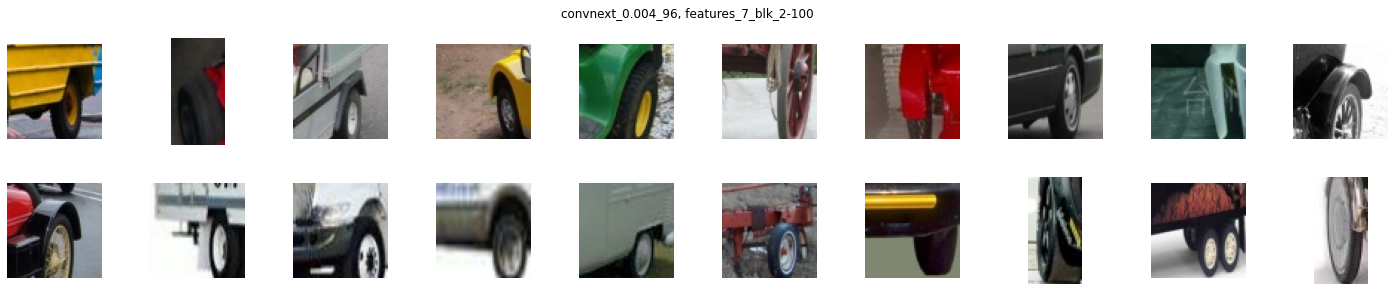

In [12]:
model_nickname = 'convnext_0.004_96'
layer = 'features_7_blk_2'
neuron_idx = 100
show_ex_patch(model_nickname, topk_s, ex_patch_size_ratio, layer, neuron_idx)

## 2-2. Measure the similarity of neurons based on their stimulus

In [13]:
class TopKKeeper:
    """
    Keep k (key, val, content) paris, where they are sorted in the descending 
    order. If a new inserted pair (key', val', content') has lower value than 
    the minimum value of the item (i.e., val' < min val), it won't be inserted.
    Content is optional.
    """
    
    def __init__(self, k):
        self.k = k
        self.keys = []
        self.vals = []
        self.contents = []


    def will_insert(self, val):
        if len(self.vals) < self.k:
            return True
        elif self.vals[-1] < val:
            return True
        return False

        
    def insert(self, val, key=None, content=None):
        # Check whether we want to insert the item or not
        if not self.will_insert(val):
            return
        
        # Insert
        reach_end = True
        for i, e in enumerate(self.vals):
            if e < val:
                if key is not None:
                    self.keys = self.keys[:i] + [key] + self.keys[i:]
                    self.keys = self.keys[:self.k]

                self.vals = self.vals[:i] + [val] + self.vals[i:]
                self.vals = self.vals[:self.k]

                if content is not None:
                    self.contents = \
                        self.contents[:i] + [content] + self.contents[i:]
                    self.contents = self.contents[:self.k]

                reach_end = False
                break
        if reach_end:
            if key is not None:
                self.keys.append(key)
                self.keys = self.keys[:self.k]

            self.vals.append(val)
            self.vals = self.vals[:self.k]

            if content is not None:
                self.contents.append(content)
                self.contents = self.contents[:self.k]

In [14]:
def jaccard_sim(a, b):
    if len(a) == 0 or len(b) == 0:
        return 0
    n_common = 0
    for item in a:
        if item in b:
            n_common += 1
    return n_common / (len(a) + len(b) - n_common)

def get_most_similar_neurons(model_nickname_1, layer_1, neuron_1, model_nickname_2, topk_s, k=10):
    # Get neuron1's stimuli
    model1_stimulus = load_stimulus(model_nickname_1, topk_s)
    n1_stimuli = model1_stimulus[layer_1][neuron_1]
    
    # Iterate through neurons in model2 and get neurons that are most similar to neuron1
    model2_stimulus = load_stimulus(model_nickname_2, topk_s)
    model2_layers = list(model2_stimulus.keys())
    topk_keeper = TopKKeeper(k)
    for layer in model2_layers:
        for neuron_2, n2_stimuli in enumerate(model2_stimulus[layer]):
            j_sim = jaccard_sim(n1_stimuli, n2_stimuli)
            neuron_2_id = f'{layer}-{neuron_2}'
            if j_sim > 0:
                topk_keeper.insert(j_sim, key=neuron_2_id)
    
    # Return results
    most_similar_neurons = topk_keeper.keys
    jaccard_similarities = topk_keeper.vals
    result = {n: s for n, s in zip(most_similar_neurons, jaccard_similarities)}
    return result

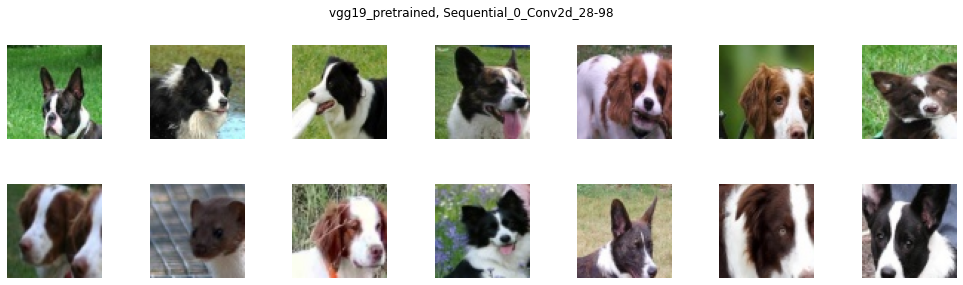

In [15]:
# Neuron 1
model_nickname_1 = 'vgg19_pretrained'
layer_1 = 'Sequential_0_Conv2d_28'
neuron_1 = 98
topk_s = 15

show_ex_patch(model_nickname_1, topk_s, ex_patch_size_ratio, layer_1, neuron_1)

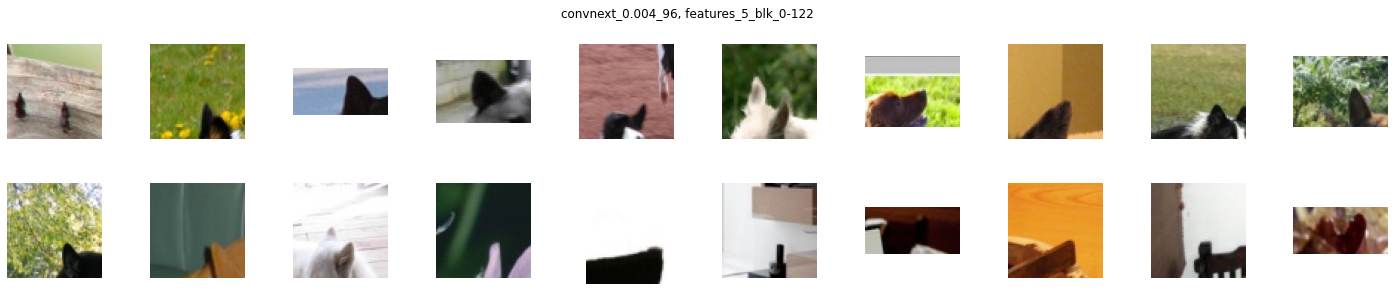

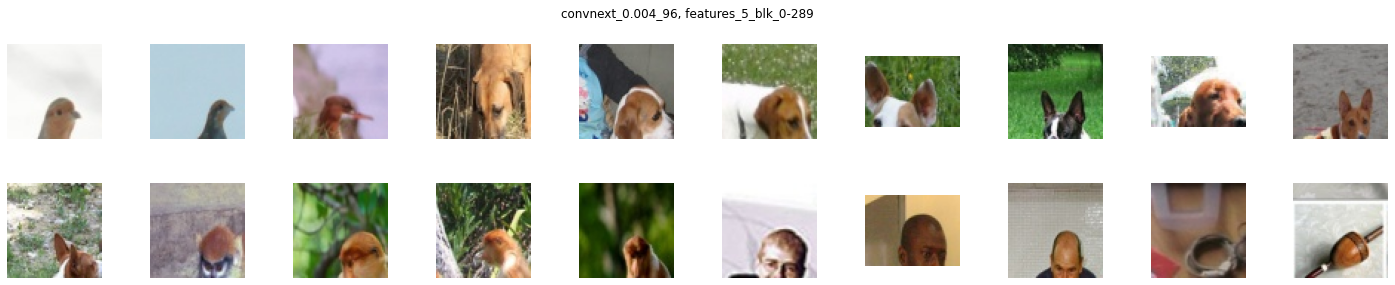

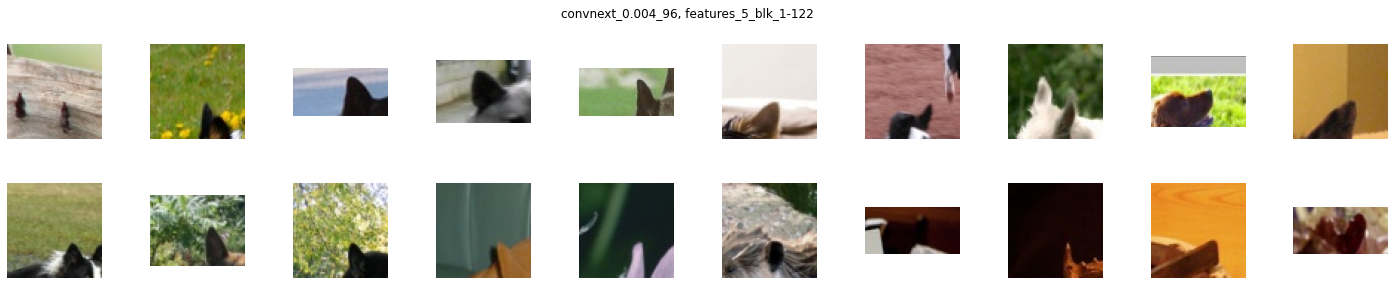

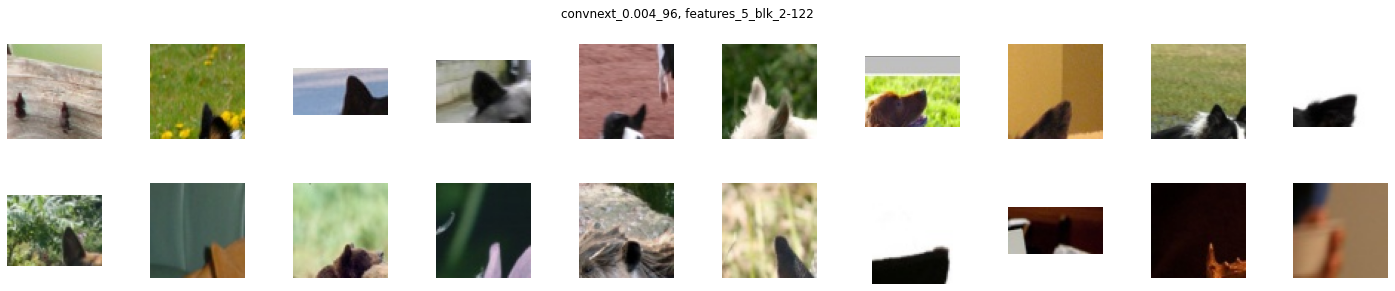

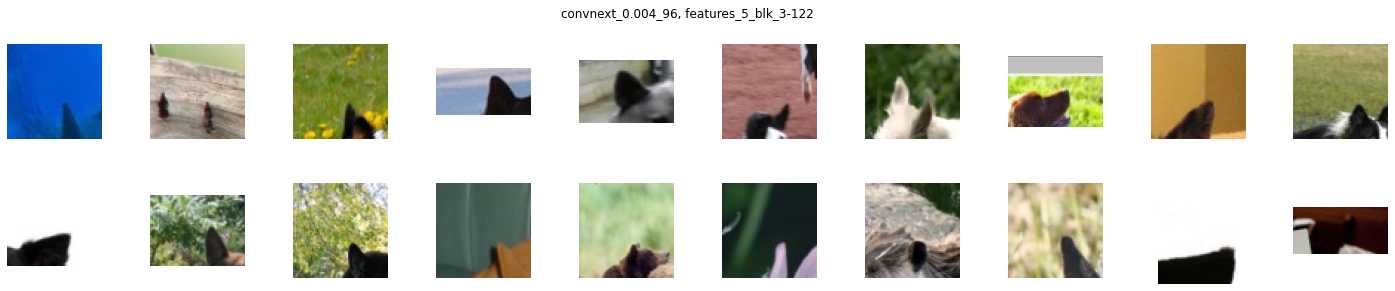

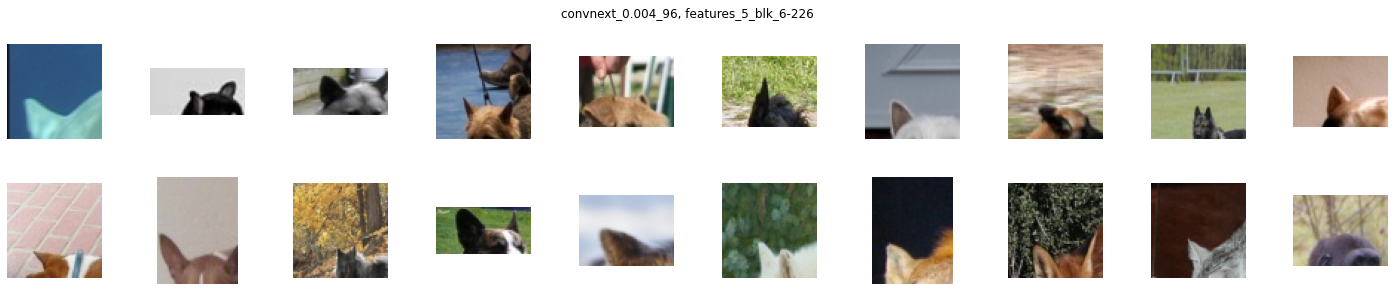

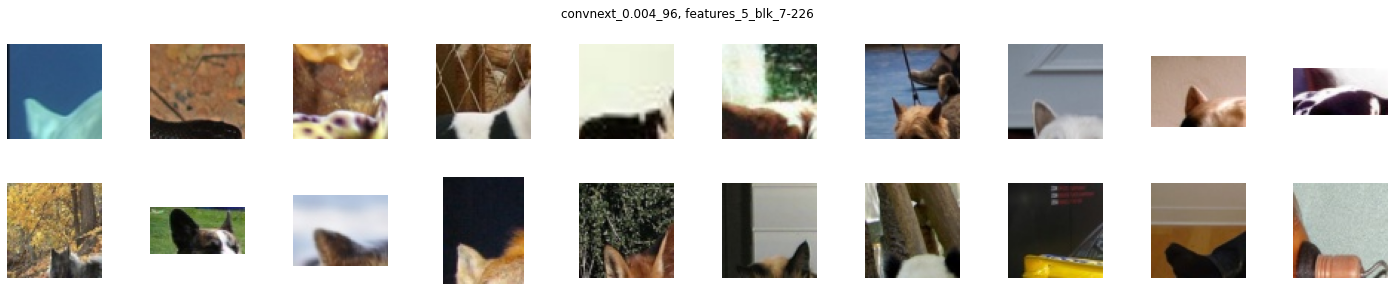

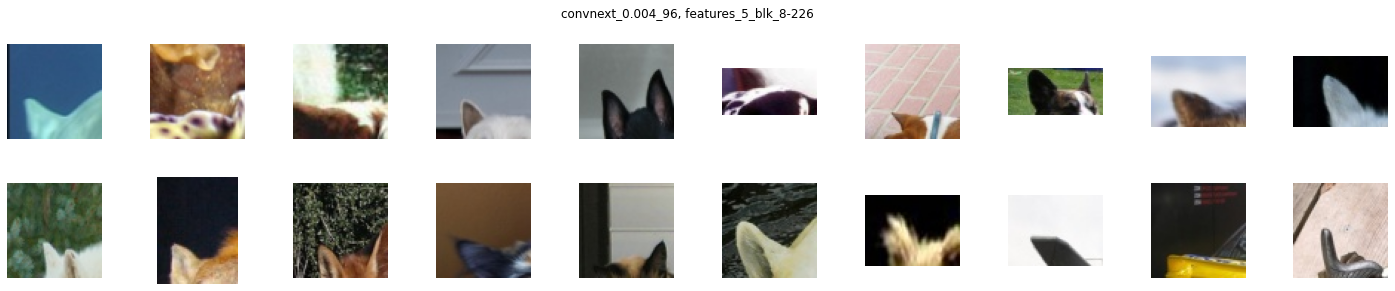

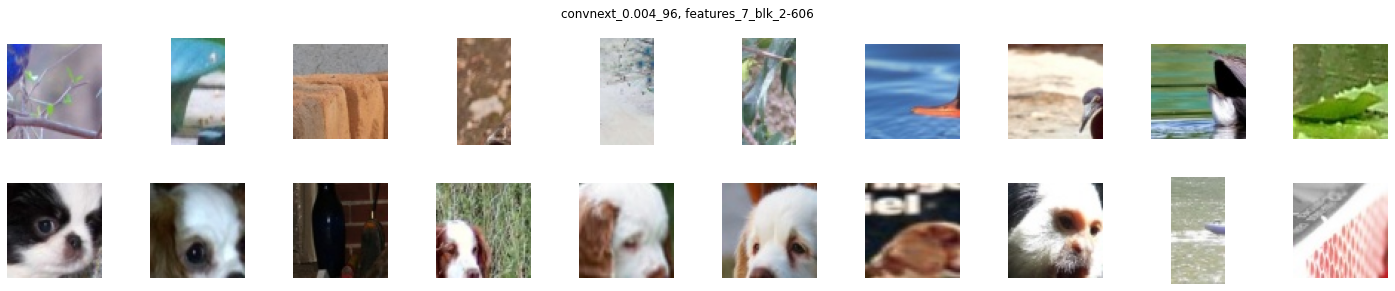

In [16]:
# Find neurons in model 2 that are most similar to neuron 1
model_nickname_2 = 'convnext_0.004_96'
topk_s = 20

similar_neurons = get_most_similar_neurons(
    model_nickname_1, 
    layer_1, 
    neuron_1, 
    model_nickname_2, 
    topk_s, 
    k=10
)

model2_stimulus = load_stimulus(model_nickname_2, topk_s)
for neuron2 in similar_neurons:
    layer, neuron2_idx = neuron2.split('-')
    neuron2_idx = int(neuron2_idx)
    show_ex_patch(model_nickname_2, topk_s, ex_patch_size_ratio, layer, neuron2_idx)

# 3. How many images are covered by the base model's stimulus data?

In [141]:
basemodel_nickname = 'vgg19_pretrained'
topk_s = 20
base_stimulus = load_stimulus(basemodel_nickname, topk_s)

In [142]:
imgs = {}
for layer in base_stimulus:
    for neuron_stimuli in base_stimulus[layer]:
        for img in neuron_stimuli:
            if img not in imgs:
                imgs[img] = 0
            imgs[img] += 1

In [145]:
num_total_imgs = 1281167
num_covered_imgs = len(imgs)
print(f"There are {num_covered_imgs} images ({num_covered_imgs / num_total_imgs * 100}%) covered by the base model's stimuli.")

There are 56475 images (4.408090436297532%) covered by the base model's stimuli.


## 4. How many images in ConvNeXt's stimulus data can be covered by the base model's stimulus data?

In [17]:
convnext_nickname = 'convnext_0.004_96'
topk_s = 20
convnext_stimulus = load_stimulus(convnext_nickname, topk_s)

In [21]:
convnext_imgs = {}
num_covered_imgs = 0

covered_neurons = {}
num_total_neurons = 0

for layer in convnext_stimulus:
    for n, neuron_stimuli in enumerate(convnext_stimulus[layer]):
        for img in neuron_stimuli:
            if img not in convnext_imgs:
                convnext_imgs[img] = 0
            convnext_imgs[img] += 1
            
            if img in imgs:
                num_covered_imgs += 1
                covered_neurons[f'{layer}-{n}'] = True
        num_total_neurons += 1

In [20]:
num_total_imgs = len(convnext_imgs)
print(f"There are {num_covered_imgs} images ({num_covered_imgs / num_total_imgs * 100}%) covered by the base model's stimuli.")

There are 131 images (0.1344458470601517%) covered by the base model's stimuli.


In [22]:
num_covered_neurons = len(covered_neurons)
print(f"There are {num_covered_neurons} neurons ({num_covered_neurons / num_total_neurons * 100}%) covered by the base model's stimuli.")

There are 26 neurons (0.30092592592592593%) covered by the base model's stimuli.
